In [ ]:
#importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
#viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [ ]:
#exploring genres column
df['Genre'].head()


,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [ ]:
#check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [ ]:
#exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
#casting column a
df["Release_Date"]=pd.to_datetime(df["Release_Date"])
print(df)

     Release_Date                                 Title  \
0      2021-12-15               Spider-Man: No Way Home   
1      2022-03-01                            The Batman   
2      2022-02-25                               No Exit   
3      2021-11-24                               Encanto   
4      2021-12-22                        The King's Man   
...           ...                                   ...   
9822   1973-10-15                              Badlands   
9823   2020-10-01                      Violent Delights   
9824   2016-05-06                          The Offering   
9825   2021-03-31  The United States vs. Billie Holiday   
9826   1984-09-23                               Threads   

                                               Overview  Popularity  \
0     Peter Parker is unmasked and no longer able to...    5083.954   
1     In his second year of fighting crime, Batman u...    3827.658   
2     Stranded at a rest stop in the mountains durin...    2618.087   
3     T

In [ ]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
df['Only_Date']=df['Release_Date'].dt.date
df['Year']=df['Release_Date'].dt.year
df['Year'].dtypes

dtype('int32')

In [ ]:
#Dropping Overview,Original_Language and Poster-Url
#making list of colomn to be dropped
cols=['Overview','Original_Language','Poster_Url']
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Only_Date', 'Year'],
      dtype='object')

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021-12-15,2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022-03-01,2022
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022-02-25,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021-11-24,2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021-12-22,2021


In [ ]:
def catigorize_col(df, col, labels):

    #setting the edges to cut the column accordingly
    edges=[
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]

    # cut the column into catigories
    df[col]=pd.cut(df[col],bins=edges,labels=labels,duplicates='drop')

    return df

In [ ]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

# Let's redefine the logic inside the cell to ensure it works with the current dataframe state
def catigorize_col_safe(df, col, labels):
    stats = df[col].describe()
    # Extract edges and ensure they are unique to avoid binning errors
    edges = sorted(list(set([
        stats['min'],
        stats['25%'],
        stats['50%'],
        stats['75%'],
        stats['max']
    ])))

    # If duplicate edges were dropped, we need to adjust labels length
    adjusted_labels = labels[:len(edges)-1]

    df[col] = pd.cut(df[col], bins=edges, labels=adjusted_labels, include_lowest=True)
    return df

try:
    df = catigorize_col_safe(df, 'Vote_Average', labels)
    print("Unique categories in Vote_Average:", df['Vote_Average'].unique())
except Exception as e:
    print(f"An error occurred: {e}")

Unique categories in Vote_Average: ['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  9827 non-null   datetime64[ns]
 1   Title         9827 non-null   object        
 2   Popularity    9827 non-null   float64       
 3   Vote_Count    9827 non-null   int64         
 4   Vote_Average  9827 non-null   category      
 5   Genre         9827 non-null   object        
 6   Only_Date     9827 non-null   object        
 7   Year          9827 non-null   int32         
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 509.0+ KB


In [ ]:
#exploring column
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2567
popular,2450
average,2412
below_avg,2398


In [ ]:
#dropping  NaNs
df.dropna(inplace=True)
#confirming
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Only_Date,0
Year,0


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021-12-15,2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022-03-01,2022
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller,2022-02-25,2022
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021-11-24,2021
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021-12-22,2021


In [ ]:
#split the string into lists
df['Genre']=df['Genre'].str.split(',')
#explode the lists
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021-12-15,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021-12-15,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021-12-15,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022-03-01,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022-03-01,2022


In [ ]:
#casting column into category
df['Genre']=df['Genre'].astype('category')
#confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25793 non-null  datetime64[ns]
 1   Title         25793 non-null  object        
 2   Popularity    25793 non-null  float64       
 3   Vote_Count    25793 non-null  int64         
 4   Vote_Average  25793 non-null  category      
 5   Genre         25793 non-null  category      
 6   Only_Date     25793 non-null  object        
 7   Year          25793 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
df.nunique()

,0
Release_Date,5893
Title,9513
Popularity,8160
Vote_Count,3266
Vote_Average,4
Genre,38
Only_Date,5893
Year,102


In [ ]:
#-----------Data Visualization------------

#setting up seaborn configurations
sns.set_style('whitegrid')

In [ ]:
#Q1: What is the most frequent genre in the dataset
#showing stats.on genre column
df['Genre'].describe()

,Genre
count,25793
unique,38
top,Thriller
freq,1973


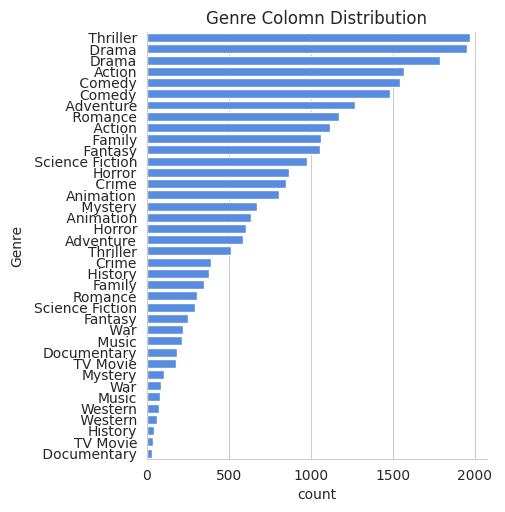

In [ ]:
#Visualizing the genre colomn distribution
sns.catplot(y='Genre',data=df,kind='count',
    order=df['Genre'].value_counts().index,
    color='#4287f5')

plt.title('Genre Colomn Distribution')
plt.show()

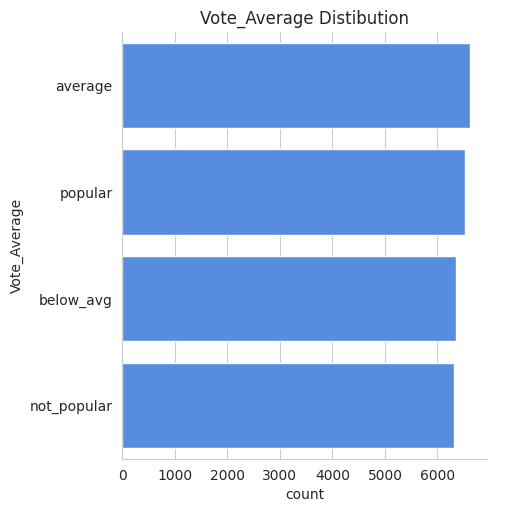

In [ ]:
#Q2:What genrea has highest votes
#Visualizing the Vote_Average column distribution
sns.catplot(
    y='Vote_Average',
    data=df,
    kind='count',
    order=df['Vote_Average'].value_counts().index,
    color='#4287f5'
)

plt.title('Vote_Average Distibution')
plt.show()

In [ ]:
#Q3:What movie got the highest genre
#Checking max popularity in dataset
df[df['Popularity']==df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021-12-15,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021-12-15,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021-12-15,2021


In [ ]:
#Q4:What movie got the lowest genre
#Checking min popularity in dataset
df[df['Popularity']==df['Popularity'].min()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Only_Date,Year
25787,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music,2021-03-31,2021
25788,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama,2021-03-31,2021
25789,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History,2021-03-31,2021
25790,1984-09-23,Threads,13.354,186,popular,War,1984-09-23,1984
25791,1984-09-23,Threads,13.354,186,popular,Drama,1984-09-23,1984
25792,1984-09-23,Threads,13.354,186,popular,Science Fiction,1984-09-23,1984


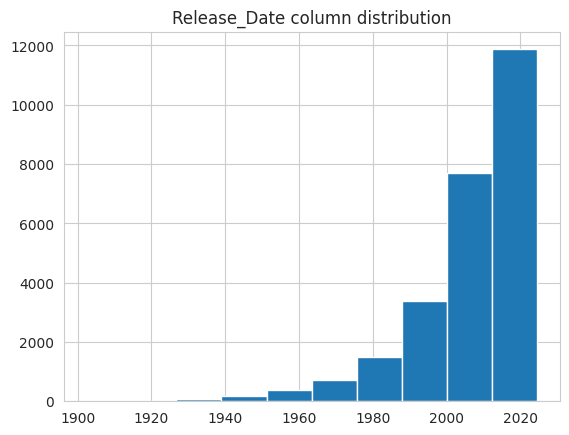

In [ ]:
#Q5:Which year has the most filmmed movies
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

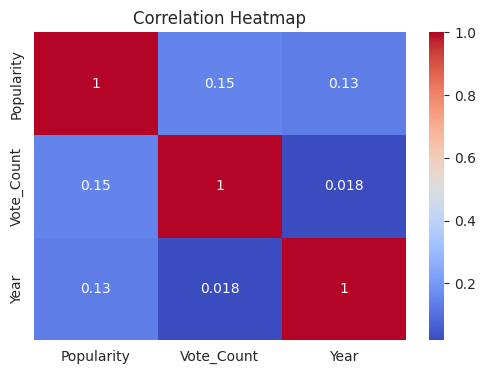

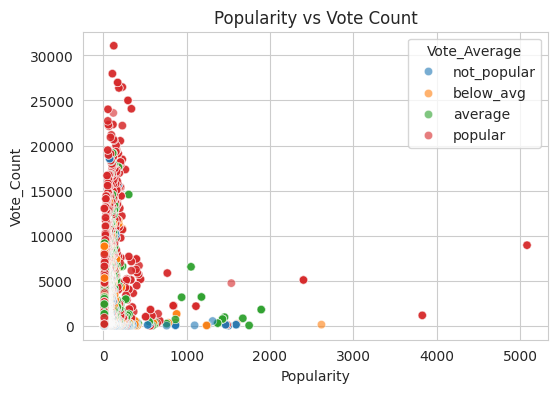

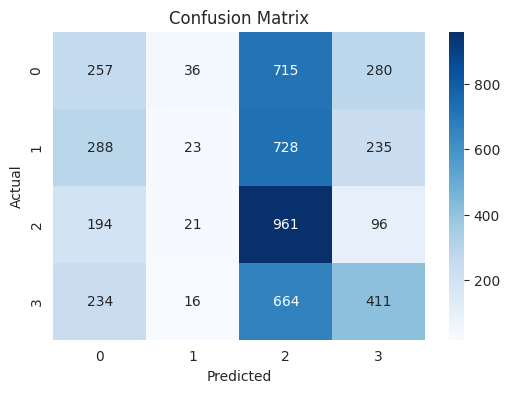

              precision    recall  f1-score   support

           0       0.26      0.20      0.23      1288
           1       0.24      0.02      0.03      1274
           2       0.31      0.76      0.44      1272
           3       0.40      0.31      0.35      1325

    accuracy                           0.32      5159
   macro avg       0.30      0.32      0.26      5159
weighted avg       0.31      0.32      0.26      5159



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

le = LabelEncoder()
df['Vote_Average_Enc'] = le.fit_transform(df['Vote_Average'])

X = df[['Popularity', 'Vote_Count']]
y = df['Vote_Average_Enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(df[['Popularity', 'Vote_Count', 'Year']].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Popularity',
    y='Vote_Count',
    hue='Vote_Average',
    data=df,
    alpha=0.6
)
plt.title("Popularity vs Vote Count")
plt.show()


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))